# Native Contact Analysis for Drug-Bound Systems
## Project: Exploring the disruption of SARS-CoV-2 RBD binding to hACE2
### Code adapted from MDTraj: https://mdtraj.org/1.9.3/examples/native-contact.html
### Additional code written by Camryn Carter

All inputs are specific to my SARS-CoV-2 RBD inhibitors project.

In [1]:
#interface
import numpy as np
import mdtraj as md
from itertools import combinations

def test_best_hummer_q(traj, native):
    """Compute the fraction of native contacts according the definition from
    Best, Hummer and Eaton [1]
    
    Parameters
    ----------
    traj : md.Trajectory
        The trajectory to do the computation for
    native : md.Trajectory
        The 'native state'. This can be an entire trajecory, or just a single frame.
        Only the first conformation is used
        
    Returns
    -------
    q : np.array, shape=(len(traj),)
        The fraction of native contacts in each frame of `traj`
        
    References
    ----------
    ..[1] Best, Hummer, and Eaton, "Native contacts determine protein folding
          mechanisms in atomistic simulations" PNAS (2013)
    """
    
    BETA_CONST = 50  # 1/nm
    LAMBDA_CONST = 1.8
    NATIVE_CUTOFF = 0.45  # nanometers
    
    #Create a list of atoms based on the specific chain in the PDB. There are two chains 0 (RBD) and 1 (hACE2).
    chain0 = native.topology.select("chainid 0")
    chain1 = native.topology.select("chainid 1")
    
    #get the indices of all of the heavy atoms
    heavy = native.topology.select_atom_indices('heavy')
   
    ###Our addition to the code begins here###
    #create a list of heavy atoms in chain 0
    heavy_list0 = []
    
    for atom_index in chain0:
        if atom_index in heavy:
            heavy_list0.append(atom_index)
    
    #create a list of heavy atoms in chain 1
    heavy_list1 = []
    
    for atom_index in chain1:
        if atom_index in heavy:
            heavy_list1.append(atom_index)
    
    #First create a list of list of all possible pairs of atoms between the two chains 
    heavyPairs_list = []
    
    for x in heavy_list0:
        for y in heavy_list1:
            temp =[]
            temp.append(x)
            temp.append(y)
            heavyPairs_list.append(temp)

    #Create a numpy array using the list previously created between both of the chains        
    heavyPairs_np = np.array(heavyPairs_list)
    #print(heavyPairs_np.shape)
    
    ###Our addition to the code ends here###
    
    # compute the distances between these pairs in the native state
    heavy_pairs_distances = md.compute_distances(native[0], heavyPairs_np)[0]
    # and get the pairs s.t. the distance is less than NATIVE_CUTOFF
    native_contacts = heavyPairs_np[heavy_pairs_distances < NATIVE_CUTOFF]
    print("Number of native contacts", len(native_contacts))
    
    # now compute these distances for the whole trajectory
    r = md.compute_distances(traj, native_contacts)
    # and recompute them for just the native state
    r0 = md.compute_distances(native[0], native_contacts)
    
    q2 = np.mean(1.0 / (1 + np.exp(BETA_CONST * (r - LAMBDA_CONST * r0))), axis=1)
    return q2  

# Fosinopril 

In [2]:
#Loading in nc, prmtop, and pdb
traj = md.load_netcdf('6lzg_COVID_Spike_hACE2_w_glycans_Zn_Fosinopril_P1_100ns_all_Seeds_imaged.nc', '6lzg_COVID_Spike_hACE2_w_glycans_Zn_Fosinopril_P1.prmtop')
pdb = md.load_pdb('6lzg_COVID_Spike_hACE2_w_glycans_Glycam06j_Zn_0ns.pdb')
native = pdb

In [3]:
q_test2 = test_best_hummer_q(traj, native)
print(q_test2)
type(q_test2)

Number of native contacts 299
[0.97525114 0.960125   0.962671   ... 0.9410615  0.94289374 0.90734416]


numpy.ndarray

In [6]:
print(q_test2.mean())
print(q_test2.std())

0.95233953
0.027172057


In [4]:
q_test2.mean()


0.95233953

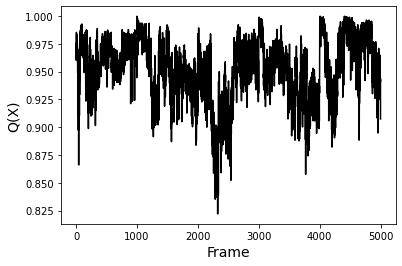

In [5]:
import matplotlib.pyplot as plt
plt.plot(q_test2, color="black")
plt.xlabel('Frame', fontsize=14)
plt.ylabel('Q(X)', fontsize=14)
plt.savefig("native_contact_binding_site_allSeeds_fosinopril.jpg", dpi = 300)

# Fosinoprilat Pose 2

In [7]:
#Loading in nc, prmtop, and pdb
traj = md.load_netcdf('6lzg_COVID_Spike_hACE2_w_glycans_Zn_Fosinoprilat_P2_100ns_all_Seeds_imaged.nc', '6lzg_COVID_Spike_hACE2_w_glycans_Zn_Fosinoprilat_P2.prmtop')

q_test = test_best_hummer_q(traj, native)
print(q_test)
type(q_test)

Number of native contacts 299
[0.98061    0.9738439  0.97635156 ... 0.95161873 0.930314   0.92332226]


numpy.ndarray

In [8]:
print(q_test.mean())
print(q_test.std())

0.95929855
0.020503433


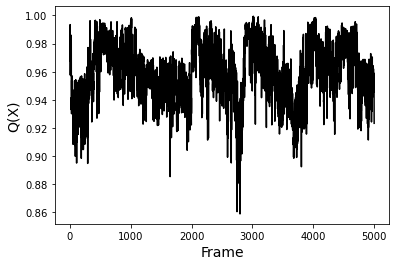

In [8]:
plt.plot(q_test, color="black")
plt.xlabel('Frame', fontsize=14)
plt.ylabel('Q(X)', fontsize=14)
plt.savefig("native_contact_binding_site_allSeeds_fosinoprilat_P2.jpg", dpi = 300)

# Fosinoprilat Pose 3

In [9]:
#Loading in nc, prmtop, and pdb
traj = md.load_netcdf('6lzg_COVID_Spike_hACE2_w_glycans_Zn_Fosinoprilat_P3_100ns_all_Seeds_imaged.nc', '6lzg_COVID_Spike_hACE2_w_glycans_Zn_Fosinoprilat_P3.prmtop')

q_test = test_best_hummer_q(traj, native)
print(q_test)
#type(q_test)

Number of native contacts 299
[0.9929573  0.9887288  0.99268293 ... 0.8741177  0.8677457  0.8688581 ]


In [10]:
print(q_test.mean())
print(q_test.std())

0.95633125
0.02436807


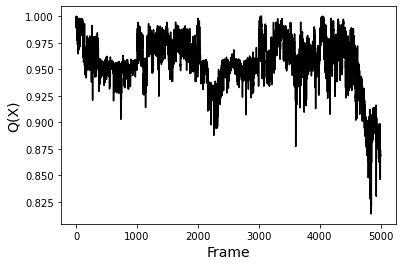

In [11]:
plt.plot(q_test, color="black")
plt.xlabel('Frame', fontsize=14)
plt.ylabel('Q(X)', fontsize=14)
plt.savefig("native_contact_binding_site_allSeeds_fosinoprilat_P3.jpg", dpi = 300)

# Lisinopril

In [11]:
#Loading in nc, prmtop, and pdb
traj = md.load_netcdf('6lzg_COVID_Spike_hACE2_w_glycans_Zn_Lisinopril_NH_P1_100ns_all_Seeds_imaged.nc', '6lzg_COVID_Spike_hACE2_w_glycans_Zn_Lisinopril_NH_P1.prmtop')

q_test = test_best_hummer_q(traj, native)
print(q_test)
#type(q_test)

Number of native contacts 299
[0.9971422  0.99570006 0.9933919  ... 0.95192575 0.95205915 0.94858307]


In [12]:
print(q_test.mean())
print(q_test.std())

0.9590437
0.022404071


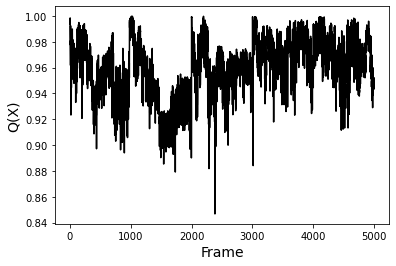

In [14]:
plt.plot(q_test, color="black")
plt.xlabel('Frame', fontsize=14)
plt.ylabel('Q(X)', fontsize=14)
plt.savefig("native_contact_binding_site_allSeeds_lisinopril_NH_P1.jpg", dpi = 300)